In [67]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

brca = load_breast_cancer()
# split dataset into 75% training and 25% testing samples
X_train, X_test, y_train, y_test = train_test_split(brca.data, brca.target, stratify=brca.target, random_state=63)

In [68]:
# inspect the dataset
print(brca.feature_names)
print(brca.target_names)
brca.data.shape

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


(569, 30)

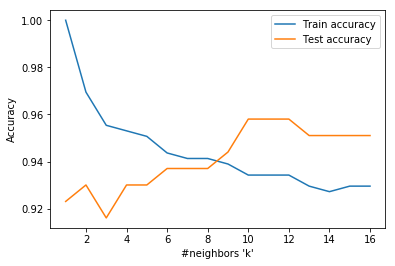

In [69]:
from sklearn.neighbors import KNeighborsClassifier

# test for different number of neighbors
train_scores = []
test_scores = []

krange = range(1, 17)
for k in krange:
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    train_scores.append(knc.score(X_train, y_train))
    test_scores.append(knc.score(X_test, y_test))

# plotting
plt.plot(krange, train_scores, label='Train accuracy')
plt.plot(krange, test_scores, label='Test accuracy')
plt.xlabel('#neighbors \'k\'')
plt.ylabel('Accuracy')
plt.legend()

Training accuracy of Logistic Regression (C=1): 0.951
Testing accuracy of Logistic Regression (C=1): 0.965


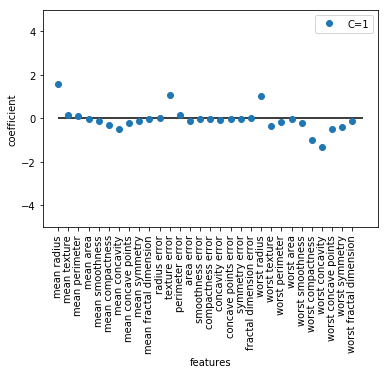

In [70]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

print('Training accuracy of Logistic Regression (C=1): {:.3f}'.format(lr.score(X_train, y_train)))
print('Testing accuracy of Logistic Regression (C=1): {:.3f}'.format(lr.score(X_test, y_test)))

plt.plot(lr.coef_.T, 'o', label='C=1')
plt.xticks(range(brca.data.shape[1]), brca.feature_names, rotation=90)
plt.hlines(0,0, brca.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('features')
plt.ylabel('coefficient')
plt.legend()

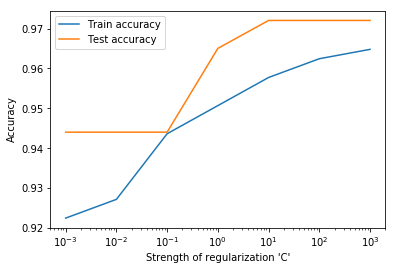

In [71]:
train_scores = []
test_scores = []

cvalues = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for c in cvalues:
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))

# plotting
plt.plot(cvalues, train_scores, label='Train accuracy')
plt.plot(cvalues, test_scores, label='Test accuracy')
plt.xscale('log')
plt.xlabel('Strength of regularization \'C\'')
plt.ylabel('Accuracy')
plt.legend()

Training accuracy of Decision Tree classifier: 0.979
Training accuracy of Decision Tree classifier: 0.923


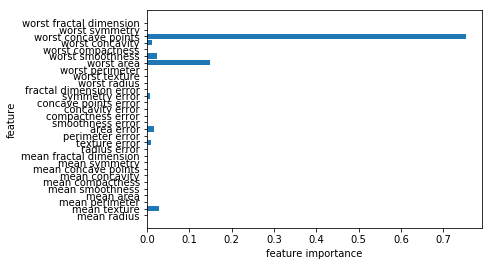

In [72]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train, y_train)

print('Training accuracy of Decision Tree classifier: {:.3f}'.format(tree.score(X_train, y_train)))
print('Training accuracy of Decision Tree classifier: {:.3f}'.format(tree.score(X_test, y_test)))

num_features = brca.data.shape[1]
plt.barh(range(num_features), dtc.feature_importances_, align='center')
plt.yticks(np.arange(num_features), brca.feature_names)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()

Training accuracy of Random Forest classifier: 1.000
Testing accuracy of Random Forest classifier: 0.979


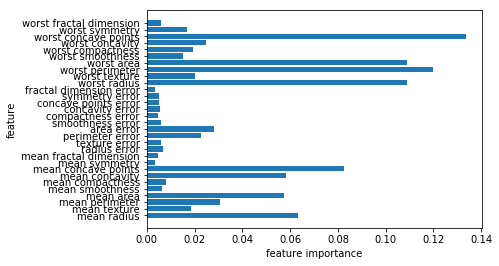

In [73]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

print('Training accuracy of Random Forest classifier: {:.3f}'.format(rfc.score(X_train, y_train)))
print('Testing accuracy of Random Forest classifier: {:.3f}'.format(rfc.score(X_test, y_test)))

num_features = brca.data.shape[1]
plt.barh(range(num_features), rfc.feature_importances_, align='center')
plt.yticks(np.arange(num_features), brca.feature_names)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()

In [74]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=69)
mlp.fit(X_train, y_train)

print('Training accuracy of MLP classifier: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Testing accuracy of MLP classifier: {:.3f}'.format(mlp.score(X_test, y_test)))

Training accuracy of Multilayer Perceptron classifier: 0.862
Testing accuracy of Multilayer Perceptron classifier: 0.916


In [75]:
# Now, scale the dataset to work well with MLP
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_scaled, y_train)

print('Training accuracy of MLP classifier: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Testing accuracy of MLP classifier: : {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Training accuracy of MLP classifier: 0.986
Testing accuracy of MLP classifier: : 0.993


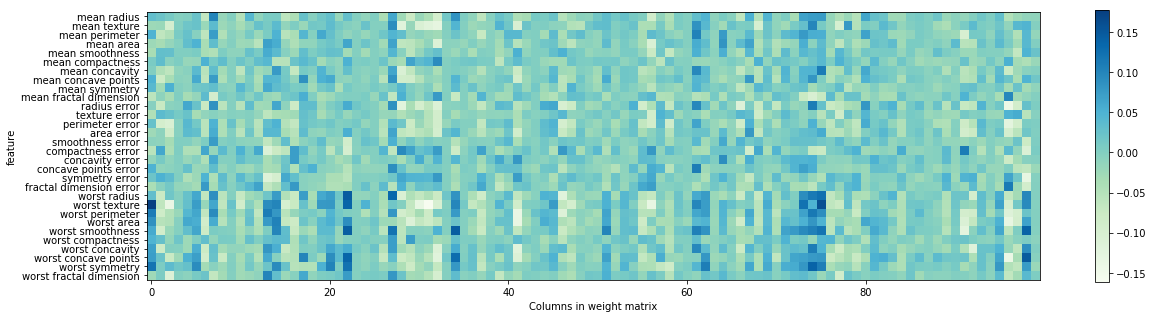

In [76]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='None', cmap='GnBu')
plt.yticks(range(30), brca.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('feature')
plt.colorbar()

In [77]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_scaled, y_train)

print('Training accuracy of SVM classifier: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('Testing accuracy of SVM classifier: : {:.3f}'.format(svm.score(X_test_scaled, y_test)))

Training accuracy of SVM classifier: 0.986
Testing accuracy of SVM classifier: : 0.979
